In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.layers import Activation,Dense,Flatten,Dropout
from keras.models import Model,Sequential
from keras.layers.convolutional import Convolution2D,MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('mnist_train.csv')

In [4]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(60000, 785)

In [6]:
#Storing Pixel array in form length width and channel in df_x
df_x = df.iloc[:,1:].values.reshape(len(df),28,28,1)

#Storing the labels in y
y = df.iloc[:,0].values

In [7]:
df_x.shape

(60000, 28, 28, 1)

In [8]:
df_y = keras.utils.to_categorical(y,num_classes=10)

In [9]:
df_x = np.array(df_x)
df_y = np.array(df_y)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [11]:
#CNN model
model = Sequential()
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               540900    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [13]:
model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 26s 544us/step - loss: 2.3281 - accuracy: 0.9143 - val_loss: 0.1250 - val_accuracy: 0.9624
Epoch 2/3
48000/48000 [==============================] - 26s 540us/step - loss: 0.1233 - accuracy: 0.9628 - val_loss: 0.0927 - val_accuracy: 0.9723
Epoch 3/3
48000/48000 [==============================] - 26s 550us/step - loss: 0.0932 - accuracy: 0.9720 - val_loss: 0.1027 - val_accuracy: 0.9737


In [16]:
predictions = model.predict(x_test)

In [27]:
import numpy as np
pred = np.argmax(predictions[0])
pred

2

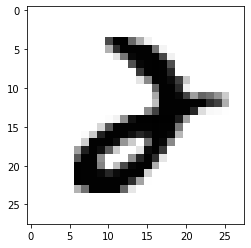

In [26]:
plt.imshow((x_test[0]),cmap='binary')